# **Google Play Store Apps Analysis**


**Name : Muhammad Ishfaq Khan**\
**Email : ishfaqkhan.dev@gmail.com**\
**GitHub : [ishfaqkhan-dev](https://github.com/ishfaqkhan-dev)**\
**LinkedIn : [https://www.linkedin.com/in/muhammad-ishfaq-khan-666b27370](https://www.linkedin.com/in/muhammad-ishfaq-khan-666b27370)**


## **Introduction**

The Google Play Store hosts millions of Android applications across various categories like games, productivity, social networking, and more. Understanding how apps perform, what factors influence their ratings, and which categories dominate the market can provide valuable insights to developers, marketers, and researchers.

In this notebook, I will explore the Google Play Store dataset to:

- Analyze app ratings and review trends.
- Understand install counts across categories.
- Identify top-rated and most-downloaded apps.
- Clean and visualize the data for better interpretation.



## **Dataset Description**

This dataset provides details of various Android applications available on the Google Play Store, including their names, categories, ratings, reviews, install counts, size, type, price, and more.

The dataset was taken from Kaggle and can be accessed here:  
🔗 [Google Play Store Apps Dataset on Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

I will now load the dataset and start exploring its structure.


---

## **Import Necessary Libraries**

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

## **Load the Dataset**


In [5]:
df = pd.read_csv('../kaggle_datasets/googleplaystore.csv')

## **Data Overview**

The dataset has been successfully loaded. Below is a preview of the first few rows. This helps identify missing values, data types, and possible anomalies in the data.


In [6]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)

# Preview first 5 rows
df.head()

Dataset Shape: (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Get info about each column: data types, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


---

## **Data Cleaning**

After inspecting the dataset using `df.info()`, the following issues have been identified:

- **Missing Values:** Several columns contain missing values. For example, `Rating`, `Type`, `Content Rating`, `Current Ver`, and `Android Ver`.
- **Incorrect Data Types:** Many columns that should be numeric are currently stored as object types (strings), such as:
  - `Reviews` (should be int)
  - `Size` (should be float or int, but has 'M', 'k', and 'Varies with device')
  - `Installs` (should be int, but has commas and '+')
  - `Price` (should be float, but has '$' symbol)
- **Potential Duplicates or Anomalies** may also exist in the data.

In the next steps, I will:
1. Handle missing values.
2. Convert data types to appropriate formats.
3. Clean inconsistent text data (like symbols in `Price` and `Installs`).
4. Prepare the dataset for analysis.


In [9]:
# Check for missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Data shape after removing duplicates
print("Dataset Shape after removing duplicates:", df.shape)

Dataset Shape after removing duplicates: (10358, 13)


### **Cleaning the 'Reviews', 'Installs', and 'Price' Columns**

These three columns are essential for numeric analysis but were stored as strings due to extra symbols and formatting. Here's how each was cleaned:

- **Reviews:** This column represents the total number of user reviews for each app. Although it contains numeric values, it was stored as a string. It was converted to a numeric type using `pd.to_numeric()`.

- **Installs:** This column included characters like commas (`,`) and plus signs (`+`) (e.g., `1,000+`, `5,000,000+`). These were removed using string replacement, and the column was then converted to a numeric format. It is important to note that the values represent **minimum installs** since the original data used a `+` sign.

- **Price:** The price column contained dollar signs (e.g., `$0.99`, `$4.99`) which made the values non-numeric. The `$` symbol was stripped out, and the column was converted to float. Free apps are now recorded as `0.0`, making price-based analysis easier.

All three columns are now in a clean, numeric format suitable for further analysis and visualization.


In [13]:
# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Clean 'Installs' column: remove ',' and '+' then convert to int
# Note: The '+' sign indicates a lower bound. Values are treated as minimum installs.
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Clean 'Price' column: remove '$' and convert to float
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


### **Cleaning the 'Size' Column**

The `Size` column contains inconsistent values such as `19M`, `512k`, and `Varies with device`. These formats are not directly suitable for analysis.

To fix this:
- All instances of `"Varies with device"` were replaced with NaN.
- Sizes ending in `M` (megabytes) were converted to float values.
- Sizes ending in `k` (kilobytes) were converted to megabytes by dividing by 1,000.
- The final `Size` column is now numeric and standardized in **megabytes**.


In [ ]:
# Replace 'Varies with device' with NaN
df['Size'] = df['Size'].replace('Varies with device', np.nan)

# Remove M and k, convert to float, convert k to MB
def convert_size(size_str):
    if isinstance(size_str, str):
        if size_str.endswith('M'):
            return float(size_str.replace('M', ''))
        elif size_str.endswith('k'):
            return float(size_str.replace('k', '')) * 0.001
    return np.nan

# Apply conversion
df['Size'] = df['Size'].apply(convert_size)

In [15]:
# after cleaning check the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


### **Handling Missing Values**

After cleaning the dataset, we need to handle missing values to avoid errors during analysis or model building. Missing values can exist due to incomplete entries or non-standard formats in the original data.

We will:
- Check how many missing values exist in each column.
- Decide whether to fill or drop them based on the importance of each column.


In [17]:
# Check number of missing values in each column
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              1
Size              1527
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### **Handling Missing Values (Final Actions)**

Based on the number of missing values and importance of columns:

- `Rating` was filled with mean value.
- `Size` was filled with median value.
- Rows with missing `Reviews`, `Installs`, and `Price` were dropped (only 1 row each).
- `Type` was filled with 'Free' (most common).
- `Content Rating` was filled with mode value.
- Rows with missing `Current Ver` and `Android Ver` were dropped (very few).

After these steps, the dataset is now free of missing values and ready for analysis.


In [22]:
# Fill missing 'Rating' with mean (important column, 1465 missing)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())  # filling numeric missing with average

# Fill missing 'Size' with median (more stable than mean for skewed data)
df['Size'] = df['Size'].fillna(df['Size'].median())

# Drop rows where 'Reviews', 'Installs', or 'Price' is missing (only 1 row each, safe to drop)
df.dropna(subset=['Reviews', 'Installs', 'Price'], inplace=True)

# Fill missing 'Type' with 'Free' (most common value)
df['Type'] = df['Type'].fillna('Free')

# Fill missing 'Content Rating' with mode (most frequent value)
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])

# Drop rows where 'Current Ver' or 'Android Ver' is missing (only 8 and 3 rows)
df.dropna(subset=['Current Ver', 'Android Ver'], inplace=True)

# Final check to confirm no missing values remain
df.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### **Final Dataset Shape After Cleaning**

The original dataset contained **10,841 rows**.

- After removing duplicate rows, the dataset was reduced to **10,358 rows**.
- After handling missing values through a combination of filling (mean, median, mode) and dropping incomplete rows, the final dataset now contains **10,347 rows**.

A total of **494 rows** were affected during the cleaning process:
- **483** duplicate rows were removed.
- **11** rows were dropped due to missing values in key columns.

The dataset is now fully cleaned, consistent, and ready for exploratory data analysis (EDA).


---

## **Exploratory Data Analysis (EDA) – Section Start**

### **Dataset Summary**

We begin EDA by examining the general statistical summary of all numerical columns using `describe()`. This helps identify the data ranges, distributions, and potential outliers.


In [23]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10347.000000,1.034700e+04,10347.000000,1.034700e+04,10347.000000
mean,4.188182,4.062945e+05,20.081534,1.417129e+07,1.031461
std,0.484138,2.698052e+06,21.023863,8.027714e+07,16.286468
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,5.700000,1.000000e+03,0.000000
50%,4.200000,1.688000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.657850e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


### **Unique Values Per Column**

Checking how many unique values exist in each column can help spot categorical data, duplicates, anomalies, and more.


In [24]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


App: 9649 unique values
Category: 33 unique values
Rating: 40 unique values
Reviews: 5999 unique values
Size: 455 unique values
Installs: 20 unique values
Type: 2 unique values
Price: 92 unique values
Content Rating: 6 unique values
Genres: 119 unique values
Last Updated: 1376 unique values
Current Ver: 2831 unique values
Android Ver: 33 unique values


### **Data Types and Structure**

Reviewing the types of each column ensures the cleaning was successful and helps plan grouping or plotting accordingly.


In [25]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### **Correlation Between Numerical Columns**

We use a heatmap to visualize how numerical columns like `Rating`, `Reviews`, `Size`, `Installs`, and `Price` are related.


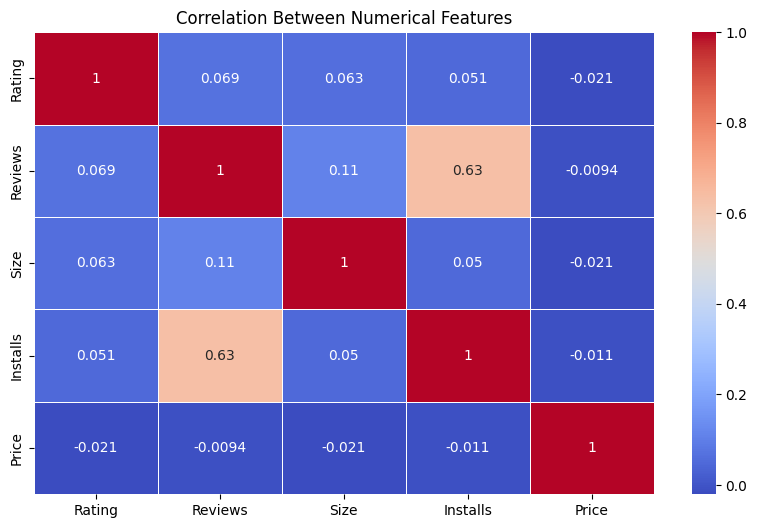

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Numerical Features')
plt.show()

### **Checking for Zero or Outlier Values**

Sometimes zero values (e.g., zero reviews, size, or installs) are either errors or special cases. Let's investigate how many apps have unusual values.


In [27]:
print("Apps with 0 Reviews:", df[df['Reviews'] == 0].shape[0])
print("Apps with 0 Installs:", df[df['Installs'] == 0].shape[0])
print("Apps with 0 Size:", df[df['Size'] == 0].shape[0])
print("Paid Apps with 0 Price:", df[(df['Type'] == 'Paid') & (df['Price'] == 0)].shape[0])

Apps with 0 Reviews: 592
Apps with 0 Installs: 15
Apps with 0 Size: 0
Paid Apps with 0 Price: 0


### **Average Rating by App Category**


In [28]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
EDUCATION              4.374535
ART_AND_DESIGN         4.368260
EVENTS                 4.362520
BOOKS_AND_REFERENCE    4.311599
PERSONALIZATION        4.304104
PARENTING              4.281590
GAME                   4.277438
BEAUTY                 4.260094
HEALTH_AND_FITNESS     4.251111
SOCIAL                 4.246513
SHOPPING               4.245401
WEATHER                4.239351
SPORTS                 4.218576
PRODUCTIVITY           4.199599
FAMILY                 4.191066
AUTO_AND_VEHICLES      4.190288
MEDICAL                4.184293
PHOTOGRAPHY            4.183266
LIBRARIES_AND_DEMO     4.182034
HOUSE_AND_HOME         4.168431
FOOD_AND_DRINK         4.167837
COMMUNICATION          4.157604
COMICS                 4.156318
NEWS_AND_MAGAZINES     4.140065
ENTERTAINMENT          4.136036
FINANCE                4.134862
BUSINESS               4.134562
LIFESTYLE              4.113107
TRAVEL_AND_LOCAL       4.107027
VIDEO_PLAYERS          4.074532
TOOLS                  4.065482

### **Total Installs by Category**

In [29]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   3.154402e+10
COMMUNICATION          2.415228e+10
SOCIAL                 1.251387e+10
PRODUCTIVITY           1.246309e+10
TOOLS                  1.145227e+10
FAMILY                 1.004163e+10
PHOTOGRAPHY            9.721248e+09
TRAVEL_AND_LOCAL       6.361887e+09
VIDEO_PLAYERS          6.222003e+09
NEWS_AND_MAGAZINES     5.393218e+09
SHOPPING               2.573349e+09
ENTERTAINMENT          2.455660e+09
PERSONALIZATION        2.074484e+09
BOOKS_AND_REFERENCE    1.916469e+09
SPORTS                 1.528574e+09
HEALTH_AND_FITNESS     1.361023e+09
BUSINESS               8.636649e+08
FINANCE                7.703487e+08
MAPS_AND_NAVIGATION    7.242819e+08
LIFESTYLE              5.348235e+08
EDUCATION              5.339520e+08
WEATHER                4.261005e+08
FOOD_AND_DRINK         2.578988e+08
DATING                 2.065361e+08
HOUSE_AND_HOME         1.252125e+08
ART_AND_DESIGN         1.243331e+08
LIBRARIES_AND_DEMO     6.199591e+07
COMICS             

### **Average Reviews and Price by Category**

In [30]:
df.groupby('Category')[['Reviews', 'Price']].mean().sort_values(by='Reviews', ascending=False)

,Reviews,Price
Category,,
SOCIAL,1.905632e+06,0.057036
COMMUNICATION,1.642824e+06,0.227158
GAME,1.262745e+06,0.256289
PHOTOGRAPHY,6.344640e+05,0.379596
VIDEO_PLAYERS,6.307439e+05,0.059771
ENTERTAINMENT,4.285650e+05,0.071892
SHOPPING,4.237998e+05,0.024464
TOOLS,3.248288e+05,0.316599
PRODUCTIVITY,2.519767e+05,0.616536


### **App Type and Content Rating Distribution**

In [31]:
df['Type'].value_counts()
df['Content Rating'].value_counts()

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

### **Top 10 Most Installed Apps**

In [32]:

df.sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3232,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707.0,13.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
4153,Hangouts,COMMUNICATION,4.0,3419464.0,13.0,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643.0,13.0,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
2554,Google+,SOCIAL,4.2,4831125.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
4170,Google Drive,PRODUCTIVITY,4.4,2728941.0,13.0,1.000000e+09,Free,0.0,Everyone,Productivity,"July 30, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,13.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
3454,Google Drive,PRODUCTIVITY,4.4,2731171.0,13.0,1.000000e+09,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device


### **Handling Repetition in Top Installed Apps**

While displaying the top 10 apps based on install count, we noticed that "Instagram" appeared more than once. All columns were identical except the number of reviews.

This indicates a possible duplicate entry with slightly different review counts. To ensure clarity in our top apps list, we removed repeated app names by keeping only the first (highest installs) entry for each app.

Note: The main dataset was not altered. This was done only for display purposes.

In [33]:
# Sorting the dataset in descending order by number of installs
top_installed = df.sort_values(by='Installs', ascending=False)

# Removing duplicate app names to avoid repetition (e.g., Instagram appearing twice)
top_installed_unique = top_installed.drop_duplicates(subset='App', keep='first')

# Selecting the top 10 most installed apps with unique names
top_10_installed = top_installed_unique.head(10)

# Displaying all columns for the top 10 installed apps
top_10_installed


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3232,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707.0,13.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
4153,Hangouts,COMMUNICATION,4.0,3419464.0,13.0,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643.0,13.0,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
2554,Google+,SOCIAL,4.2,4831125.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
4170,Google Drive,PRODUCTIVITY,4.4,2728941.0,13.0,1.000000e+09,Free,0.0,Everyone,Productivity,"July 30, 2018",Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,13.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
2544,Facebook,SOCIAL,4.1,78158306.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041.0,13.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1700,Subway Surfers,GAME,4.5,27723193.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


### **Top 10 Most Reviewed Apps**

In [34]:
df.sort_values(by='Reviews', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,13.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,13.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,13.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,13.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888.0,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


### **Top 10 Most Reviewed Apps (Unique App Names)**

While selecting the top apps based on the number of reviews, we noticed that some apps (like Instagram, Facebook, Whatsapp Messenger, and Messenger) appeared more than once due to slightly different review counts. 

To keep the results clean and meaningful, we removed repeated app names from the top list and kept only the entry with the highest number of reviews.

The original dataset was not modified. This adjustment was made only for display purposes.


In [36]:
# Sort the dataset in descending order by number of reviews
top_reviewed = df.sort_values(by='Reviews', ascending=False)

# Remove duplicate app names to avoid repetition in the top list
top_reviewed_unique = top_reviewed.drop_duplicates(subset='App', keep='first')

# Select the top 10 most reviewed apps with unique names
top_10_reviewed = top_reviewed_unique.head(10)

# Display all columns for the top 10 reviewed apps
top_10_reviewed


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,13.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,13.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,13.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888.0,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526.0,13.0,5.000000e+08,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
1872,Subway Surfers,GAME,4.5,27725352.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,13.0,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999.0,13.0,5.000000e+08,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
1878,Clash Royale,GAME,4.6,23136735.0,97.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


### **Top 10 Highest Rated Apps (min 1000 reviews)**


In [37]:
df[df['Reviews'] > 1000].sort_values(by='Rating', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4854,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272172.0,13.0,10000000.0,Free,0.0,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136.0,26.0,1000000.0,Free,0.0,Everyone,Education;Education,"July 20, 2018",2.16.11.10,4.2 and up
4975,Solitaire: Decked Out Ad Free,GAME,4.9,37302.0,35.0,500000.0,Free,0.0,Everyone,Card,"May 8, 2017",1.3.3,4.1 and up
4332,EXO-L Amino for EXO Fans,SOCIAL,4.9,5677.0,67.0,50000.0,Free,0.0,Teen,Social,"July 13, 2018",1.8.19106,4.0.3 and up
3933,Hungry Hearts Diner: A Tale of Star-Crossed Souls,FAMILY,4.9,46253.0,56.0,500000.0,Free,0.0,Everyone 10+,Simulation,"February 7, 2018",1.0.1,4.0 and up
6052,Be My Eyes - Helping the blind,LIFESTYLE,4.9,8418.0,21.0,500000.0,Free,0.0,Everyone,Lifestyle,"July 11, 2018",1.2.9,4.4 and up
6690,Br Shafi,FAMILY,4.9,1288.0,26.0,10000.0,Free,0.0,Everyone,Education,"July 11, 2018",1.0,4.1 and up
7000,PixPanda - Color by Number Pixel Art Coloring ...,FAMILY,4.9,55723.0,14.0,1000000.0,Free,0.0,Everyone,Entertainment,"June 4, 2018",3.3,4.0.3 and up
2344,Period Tracker,MEDICAL,4.9,100082.0,3.7,1000000.0,Free,0.0,Everyone,Medical,"July 9, 2018",1.2.2,4.1 and up
1258,Lose Belly Fat in 30 Days - Flat Stomach,HEALTH_AND_FITNESS,4.9,38098.0,11.0,5000000.0,Free,0.0,Everyone,Health & Fitness,"June 21, 2018",1.0.4,4.2 and up


### **Outlier Detection Using Boxplot**

Outliers are extreme values that differ significantly from other observations. They can heavily influence statistical analysis and visualizations.

To visually identify potential outliers, we use a boxplot for key numerical columns such as:

- Rating
- Reviews
- Installs
- Price
- Size

This helps us quickly spot unusually high or low values that may need further investigation or handling.


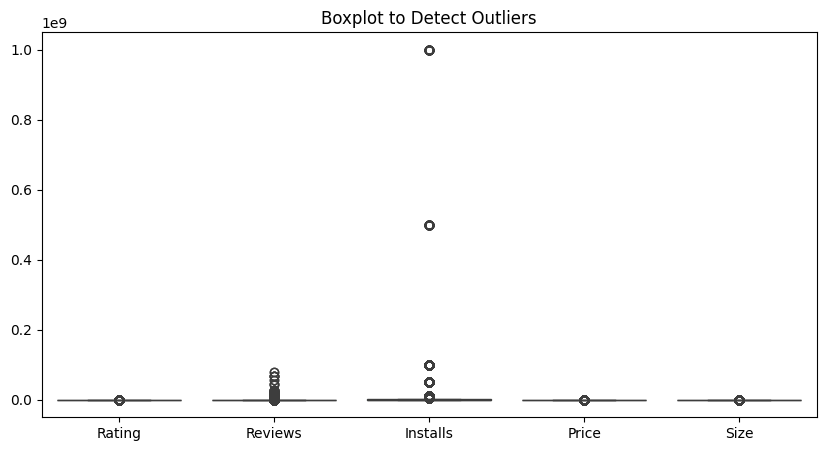

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Rating', 'Reviews', 'Installs', 'Price', 'Size']])
plt.title("Boxplot to Detect Outliers")
plt.show()

### **Distribution of App Ratings**

Understanding how app ratings are distributed helps assess overall quality perception by users.


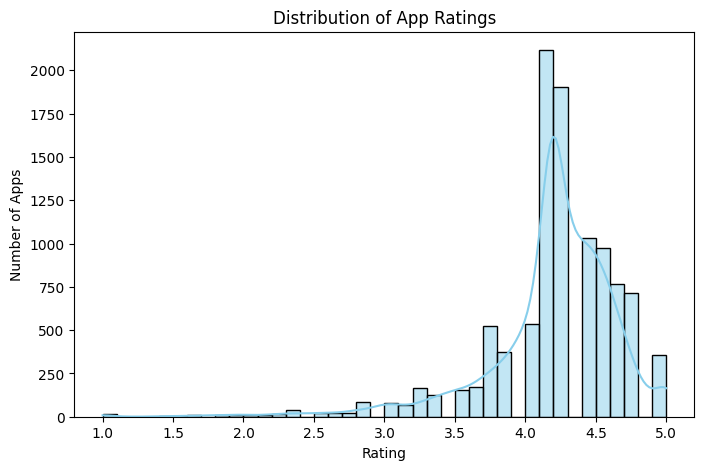

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()


### **Number of Apps per Category**

Visualizing the number of apps in each category gives an idea of market saturation.


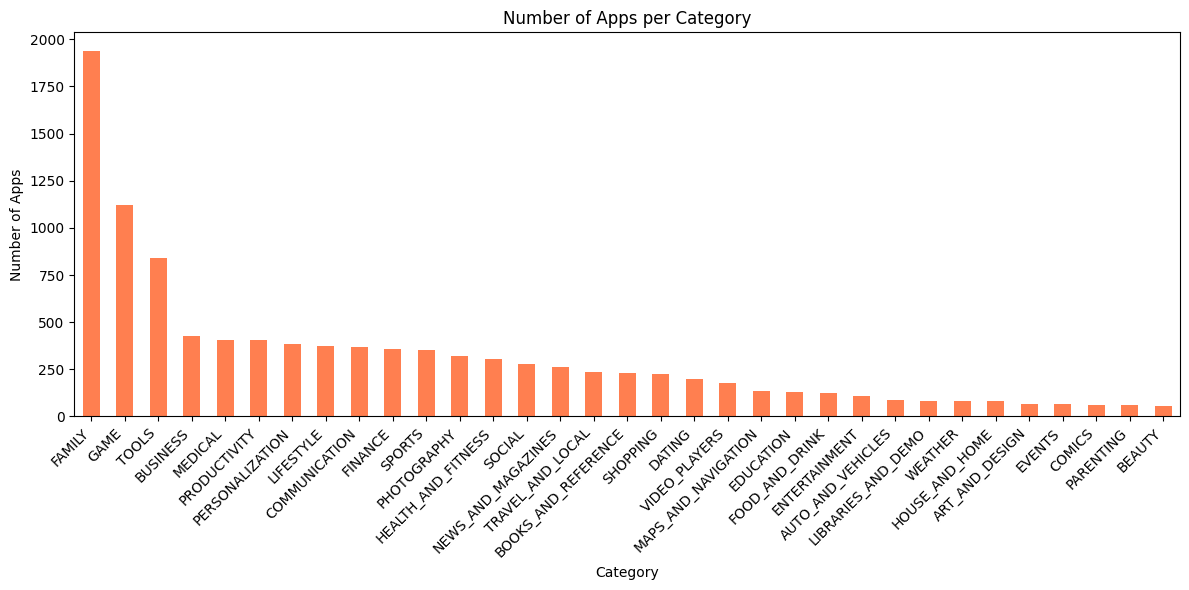

In [40]:
plt.figure(figsize=(12, 6))
df['Category'].value_counts().plot(kind='bar', color='coral')
plt.title('Number of Apps per Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **Relation Between Reviews and Rating**

This scatter plot helps us see whether highly-rated apps also get more user reviews.


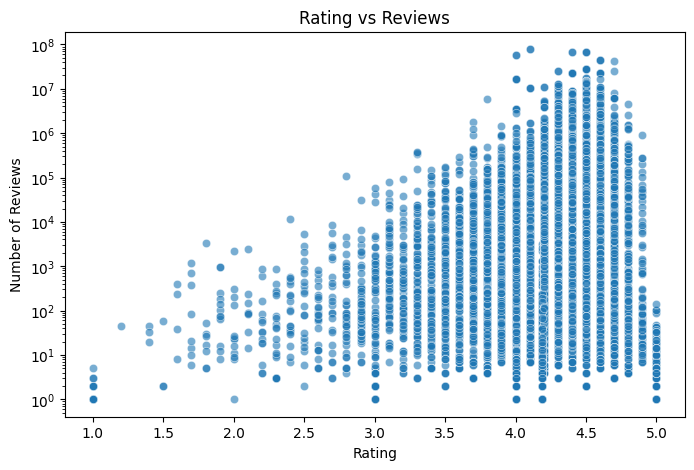

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Rating', y='Reviews', data=df, alpha=0.6)
plt.title('Rating vs Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.yscale('log')  # reviews are highly skewed
plt.show()


### **Average Rating per Category**


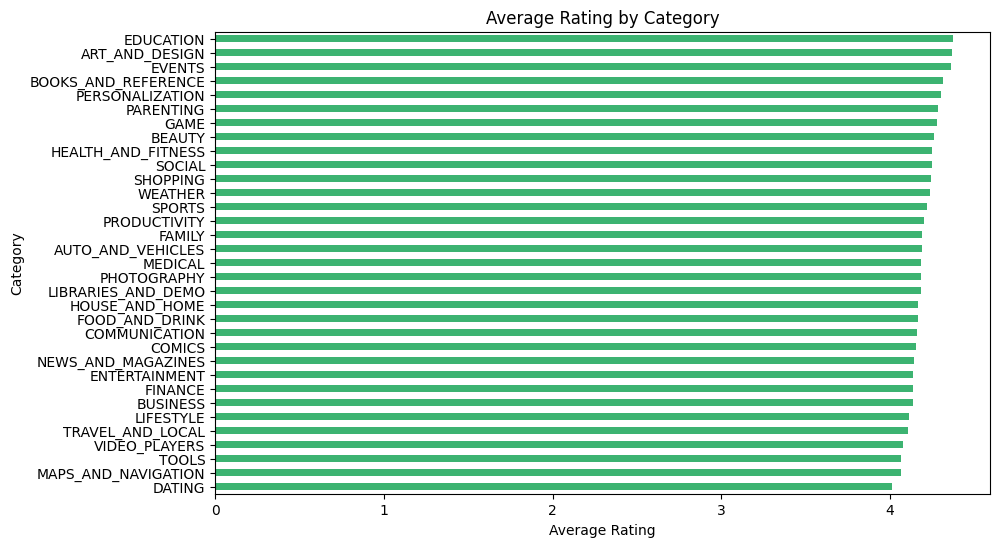

In [42]:
plt.figure(figsize=(10, 6))
avg_rating = df.groupby('Category')['Rating'].mean().sort_values()
avg_rating.plot(kind='barh', color='mediumseagreen')
plt.title('Average Rating by Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()


### **App Installs by Type**

Do free apps get more installs than paid ones? Let’s check visually.


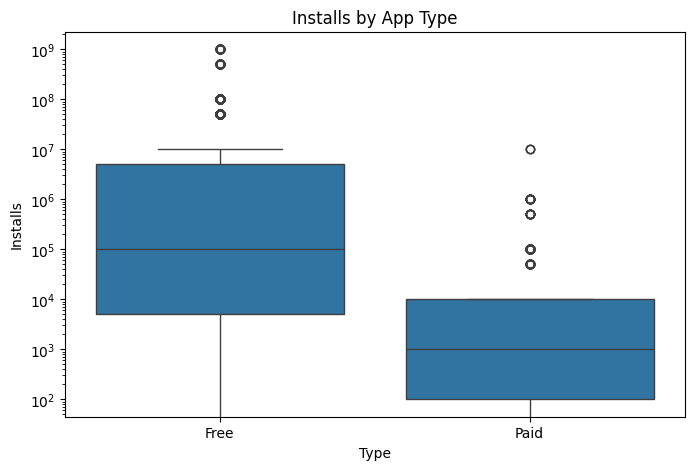

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type', y='Installs', data=df)
plt.yscale('log')  # installs are skewed
plt.title('Installs by App Type')
plt.show()


### **App Distribution by Content Rating**


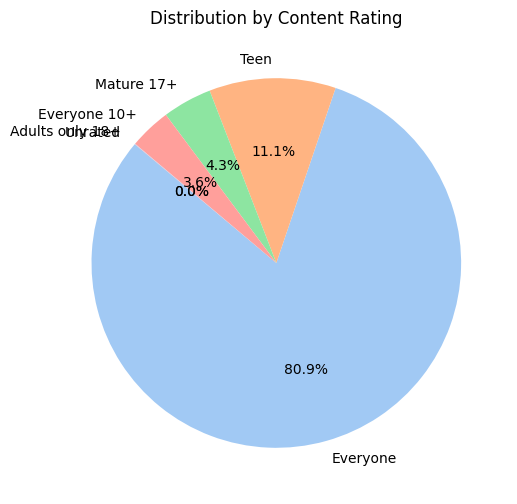

In [45]:
plt.figure(figsize=(6, 6))
df['Content Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution by Content Rating')
plt.ylabel('')
plt.show()